In [5]:
import numpy as np 
import pandas as pd

In [7]:
df = pd.read_csv('spam.csv', encoding='latin1')


In [8]:
df.shape

(5572, 5)

# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. DepLoy

In [10]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [11]:
df.drop(columns=['Unnamed: 3','Unnamed: 2','Unnamed: 4'],inplace=True)

In [12]:
df.sample(5)

,v1,v2
4053,ham,dont make ne plans for nxt wknd coz she wants ...
4238,ham,"Sez, hows u & de arab boy? Hope u r all good g..."
2654,ham,Its sarcasm.. .nt scarcasim
864,ham,Dude ive been seeing a lotta corvettes lately
3748,spam,Dear Voucher Holder 2 claim your 1st class air...


In [14]:
# Renaming the columns
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [15]:
df.sample(5)

,target,text
1038,ham,"Edison has rightly said, \A fool can ask more ..."
3807,ham,Mm you ask him to come its enough :-)
2136,ham,Well done and ! luv ya all
40,ham,Pls go ahead with watts. I just wanted to be s...
3627,ham,Meeting u is my work. . . Tel me when shall i ...


In [19]:
pip install scikit-learn

  Using cached scikit_learn-1.3.2-cp311-cp311-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached scipy-1.11.4-cp311-cp311-macosx_12_0_arm64.whl.metadata (165 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
Using cached scikit_learn-1.3.2-cp311-cp311-macosx_12_0_arm64.whl (9.4 MB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached scipy-1.11.4-cp311-cp311-macosx_12_0_arm64.whl (29.7 MB)
Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)
Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder ()

In [21]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [22]:
df['target']=encoder.fit_transform(df['target'])

In [23]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [29]:
df = df. drop_duplicates (keep='first')

In [30]:
#to check if duplicate values are there or not
df.duplicated().sum()

0

In [31]:
df.shape

(5169, 2)

# 2. EDA

In [32]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [34]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [35]:
import matplotlib.pyplot as plt

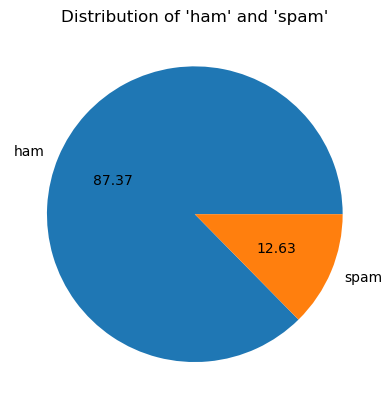

In [37]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.title("Distribution of 'ham' and 'spam'")
plt.show()

In [38]:
# Data is imbalanced

In [39]:
import nltk

In [40]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/balajik/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [41]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [42]:
df['num_characters']=df['text'].apply(len)

In [43]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [45]:
# Tokenize the 'text' column using word_tokenize
df['text'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [46]:
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [47]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [48]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [49]:
df['text'].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [50]:
df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [51]:
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [52]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [53]:
df[['num_characters', 'num_words' ,'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [59]:
#HAM
df[df['target']==0][['num_characters', 'num_words' ,'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [60]:
#SPAM
df[df['target']==1][['num_characters', 'num_words' ,'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [61]:
import seaborn as sns

/Users/balajik/anaconda3/envs/SPAM-ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

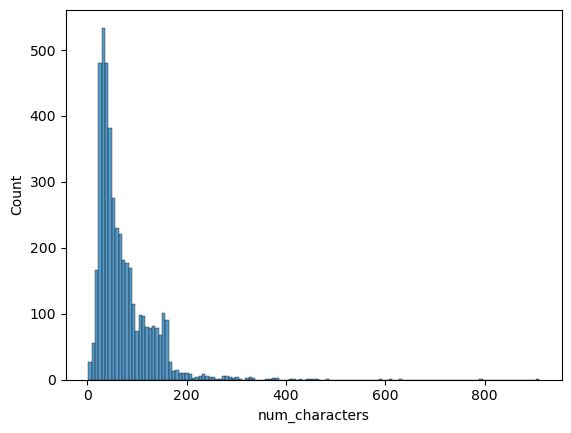

In [63]:
sns.histplot(df[df['target'] == 0]['num_characters'])

/Users/balajik/anaconda3/envs/SPAM-ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

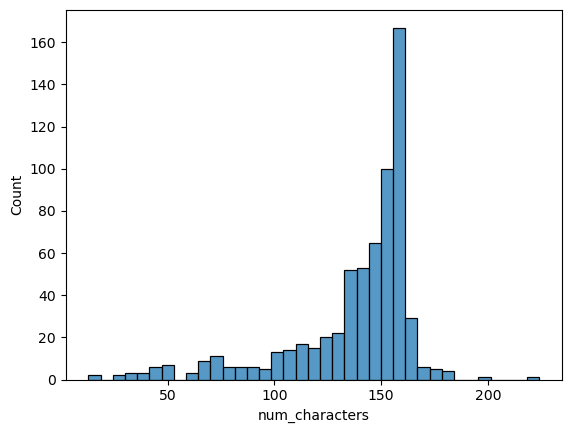

In [64]:
sns.histplot(df[df['target'] == 1]['num_characters'])

/Users/balajik/anaconda3/envs/SPAM-ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


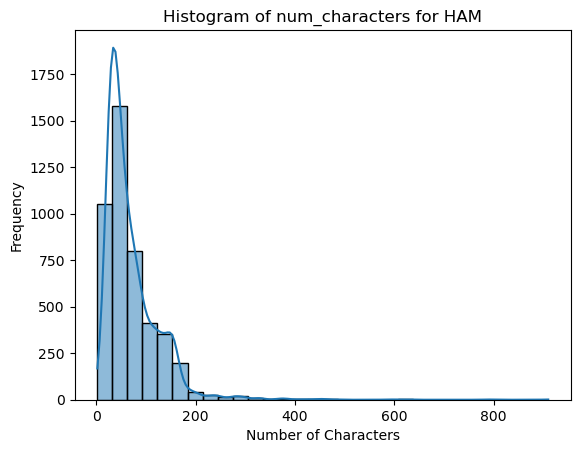

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

#  'ham' corresponds to 0 in the 'target' column
ham_data = df[df['target'] == 0]['num_characters']

# Create a histogram using Seaborn
sns.histplot(ham_data, bins=30, kde=True)  # Adjust the number of bins as needed
plt.title('Histogram of num_characters for HAM')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

/Users/balajik/anaconda3/envs/SPAM-ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


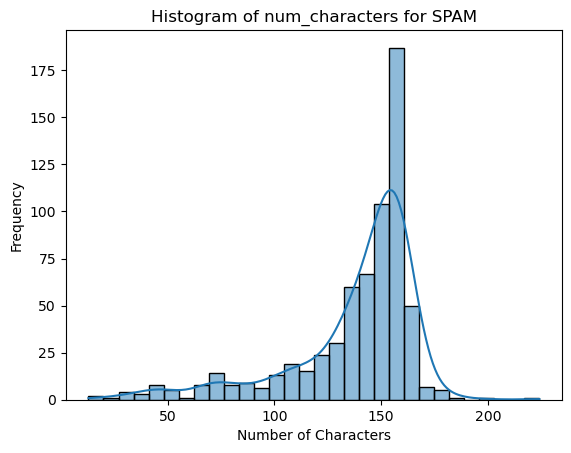

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'ham' corresponds to 0 in the 'target' column
ham_data = df[df['target'] == 1]['num_characters']

# Create a histogram using Seaborn
sns.histplot(ham_data, bins=30, kde=True)  # Adjust the number of bins as needed
plt.title('Histogram of num_characters for SPAM')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

/Users/balajik/anaconda3/envs/SPAM-ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/balajik/anaconda3/envs/SPAM-ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


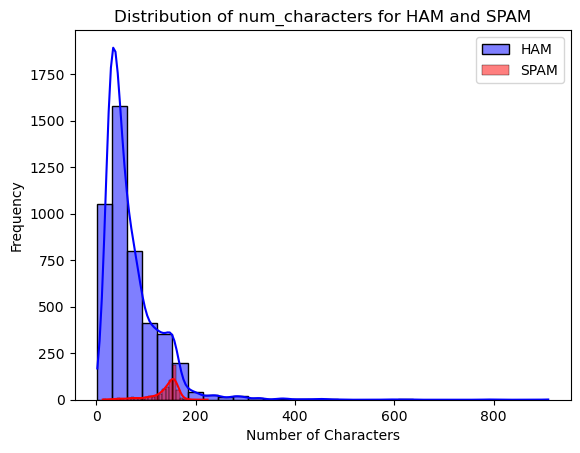

In [70]:
#  'ham' corresponds to 0 and 'spam' corresponds to 1 in the 'target' column
ham_data = df[df['target'] == 0]['num_characters']
spam_data = df[df['target'] == 1]['num_characters']

# Create histograms using Seaborn
sns.histplot(ham_data, bins=30, kde=True, label='HAM', color='blue')
sns.histplot(spam_data, bins=30, kde=True, label='SPAM', color='red')

# Set plot labels and title
plt.title('Distribution of num_characters for HAM and SPAM')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

# Show legend
plt.legend()

# Display the plot
plt.show()

/Users/balajik/anaconda3/envs/SPAM-ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/balajik/anaconda3/envs/SPAM-ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


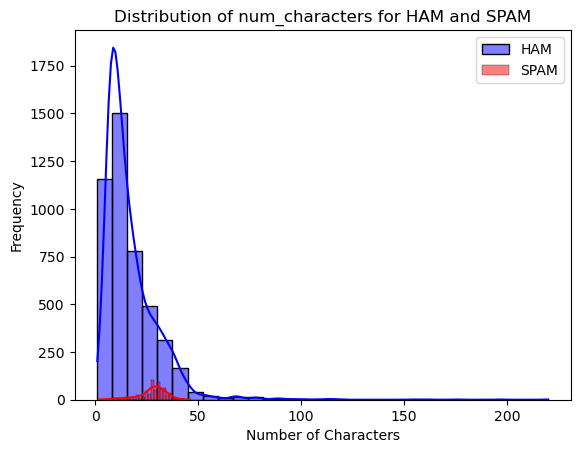

In [71]:
#  'ham' corresponds to 0 and 'spam' corresponds to 1 in the 'target' column
ham_data = df[df['target'] == 0]['num_words']
spam_data = df[df['target'] == 1]['num_words']

# Create histograms using Seaborn
sns.histplot(ham_data, bins=30, kde=True, label='HAM', color='blue')
sns.histplot(spam_data, bins=30, kde=True, label='SPAM', color='red')

# Set plot labels and title
plt.title('Distribution of num_characters for HAM and SPAM')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

# Show legend
plt.legend()

# Display the plot
plt.show()

/Users/balajik/anaconda3/envs/SPAM-ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/balajik/anaconda3/envs/SPAM-ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/balajik/anaconda3/envs/SPAM-ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


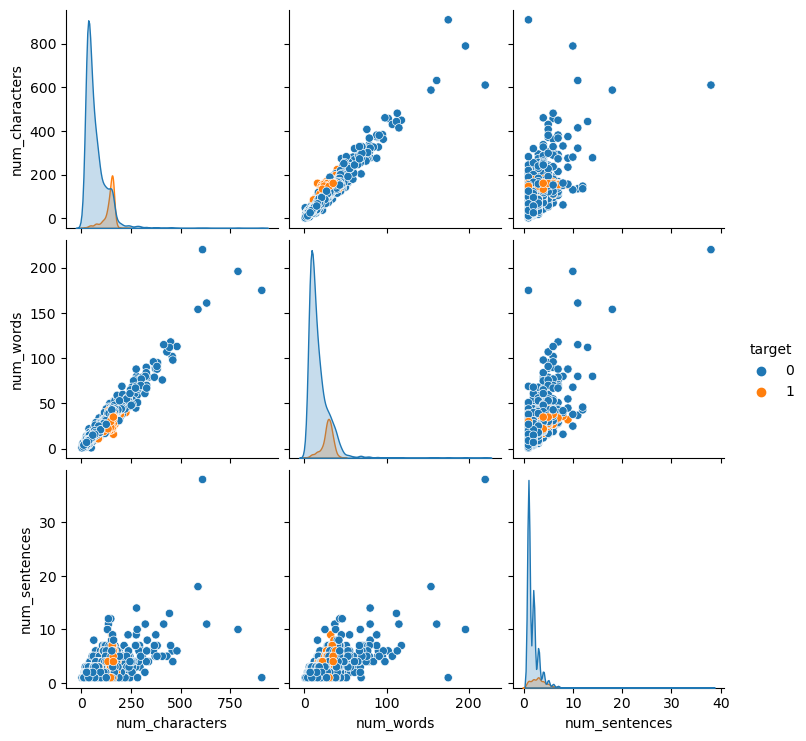

In [73]:
sns. pairplot (df,hue='target')
plt.show()

In [76]:
# Select only numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

print(correlation_matrix)


                  target  num_characters  num_words  num_sentences
target          1.000000        0.384717   0.262912       0.263939
num_characters  0.384717        1.000000   0.965760       0.624139
num_words       0.262912        0.965760   1.000000       0.679971
num_sentences   0.263939        0.624139   0.679971       1.000000


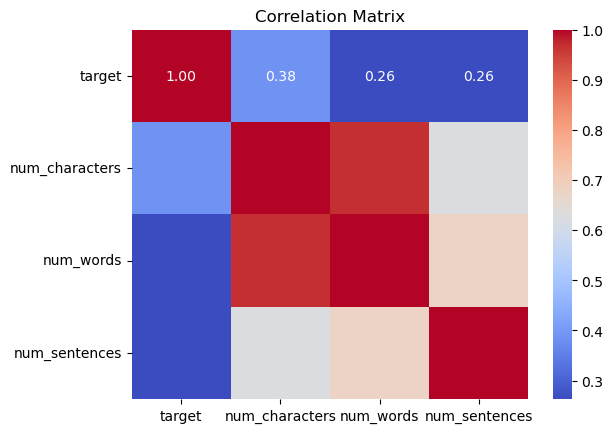

In [79]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Data preprocessing

In [83]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/balajik/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [84]:
from nltk.corpus import stopwords
import nltk

# Download the 'stopwords' resource
nltk.download('stopwords')

# Get the list of English stopwords
english_stopwords = stopwords.words('english')

# Print or use the stopwords as needed
print(english_stopwords)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/balajik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
import string

In [86]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [292]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return y


In [293]:
transform_text('HI How are You balaji ? he is Dancing')

['hi', 'balaji', 'danc']

In [102]:
df['text'].apply(transform_text)

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, 2, wkli, comp, win, fa, cup, fin...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [2nd, time, tri, 2, contact, u, pound, prize, ...
5568                          [b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: text, Length: 5169, dtype: object

In [103]:
df['transformed_text']=df['text'].apply(transform_text)

In [104]:
df.head

<bound method NDFrame.head of       target                                               text  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0              Will Ì_ b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      num_characters  num_words  num_sentences  \
0                111         24              2   
1                 29          8              2   
2              

In [105]:
# Display the first few rows of the DataFrame with the 'transformed_text' column
print(df[['target', 'text', 'num_characters', 'num_words', 'num_sentences', 'transformed_text']].head())


   target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  [go, jurong, point, crazi, avail, bugi, n, gre...  
1          8              2                       [ok, lar, joke, wif, u, oni]  
2         37              2  [free, entri, 2, wkli, comp, win, fa, cup, fin...  
3         13              1      [u, dun, say, earli, hor, u, c, alreadi, say]  
4         15              1       [nah, think, goe, usf, live, around, though]  


In [111]:
pip install wordcloud matplotlib


Note: you may need to restart the kernel to use updated packages.


In [119]:
from wordcloud import WordCloud
wc= WordCloud (width=500,height=500,min_font_size=10,background_color='white')

In [120]:
wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

In [121]:
spam_wc=wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

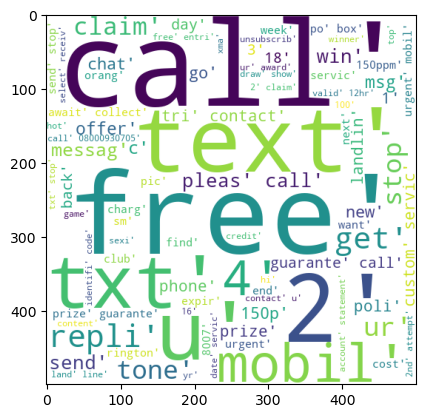

In [122]:
plt.imshow(spam_wc)

In [123]:
wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

In [127]:
ham_wc=wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

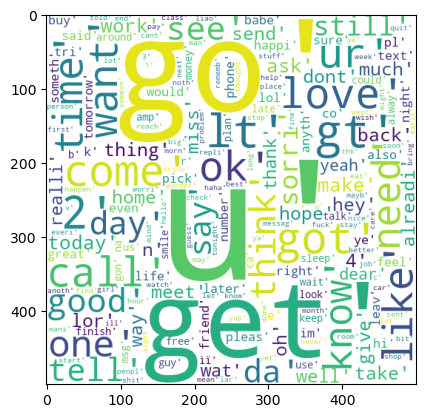

In [128]:
plt.imshow(ham_wc)

In [129]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"['go', 'jurong', 'point', 'crazi', 'avail', 'b..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"['ok', 'lar', 'joke', 'wif', 'u', 'oni']"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"['free', 'entri', '2', 'wkli', 'comp', 'win', ..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"['u', 'dun', 'say', 'earli', 'hor', 'u', 'c', ..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"['nah', 'think', 'goe', 'usf', 'live', 'around..."


In [130]:
df[df['target'] == 1]['transformed_text'].tolist()

["['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18']",
 "['freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv']",
 "['winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour']",
 "['mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030']",
 "['six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info']",
 "['urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18']",
 "['xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', '

In [133]:
spam_corpus = []
for msg in df[df['target'] == 1][ 'transformed_text'].tolist():
    for word in msg. split():
        spam_corpus. append (word)

In [134]:
spam_corpus

["['free',",
 "'entri',",
 "'2',",
 "'wkli',",
 "'comp',",
 "'win',",
 "'fa',",
 "'cup',",
 "'final',",
 "'tkt',",
 "'21st',",
 "'may',",
 "'text',",
 "'fa',",
 "'87121',",
 "'receiv',",
 "'entri',",
 "'question',",
 "'std',",
 "'txt',",
 "'rate',",
 "'c',",
 "'appli',",
 "'08452810075over18']",
 "['freemsg',",
 "'hey',",
 "'darl',",
 "'3',",
 "'week',",
 "'word',",
 "'back',",
 "'like',",
 "'fun',",
 "'still',",
 "'tb',",
 "'ok',",
 "'xxx',",
 "'std',",
 "'chg',",
 "'send',",
 "'rcv']",
 "['winner',",
 "'valu',",
 "'network',",
 "'custom',",
 "'select',",
 "'receivea',",
 "'prize',",
 "'reward',",
 "'claim',",
 "'call',",
 "'claim',",
 "'code',",
 "'kl341',",
 "'valid',",
 "'12',",
 "'hour']",
 "['mobil',",
 "'11',",
 "'month',",
 "'u',",
 "'r',",
 "'entitl',",
 "'updat',",
 "'latest',",
 "'colour',",
 "'mobil',",
 "'camera',",
 "'free',",
 "'call',",
 "'mobil',",
 "'updat',",
 "'co',",
 "'free',",
 "'08002986030']",
 "['six',",
 "'chanc',",
 "'win',",
 "'cash',",
 "'100',",
 "'pound'

In [135]:
len(spam_corpus)

9939

In [136]:
from collections import Counter
Counter (spam_corpus). most_common (30)

[("'call',", 305),
 ("'free',", 158),
 ("'2',", 154),
 ("'txt',", 137),
 ("'text',", 118),
 ("'mobil',", 106),
 ("'u',", 99),
 ("'repli',", 99),
 ("'ur',", 99),
 ("'claim',", 96),
 ("'4',", 96),
 ("'stop',", 90),
 ("'prize',", 78),
 ("'get',", 65),
 ("'tone',", 61),
 ("'servic',", 60),
 ("'new',", 58),
 ("'send',", 57),
 ("'nokia',", 55),
 ("'contact',", 53),
 ("'award',", 52),
 ("'phone',", 52),
 ("'cash',", 48),
 ("['urgent',", 48),
 ("'week',", 47),
 ("'pleas',", 44),
 ("'collect',", 43),
 ("'win',", 41),
 ("'min',", 41),
 ("'c',", 38)]

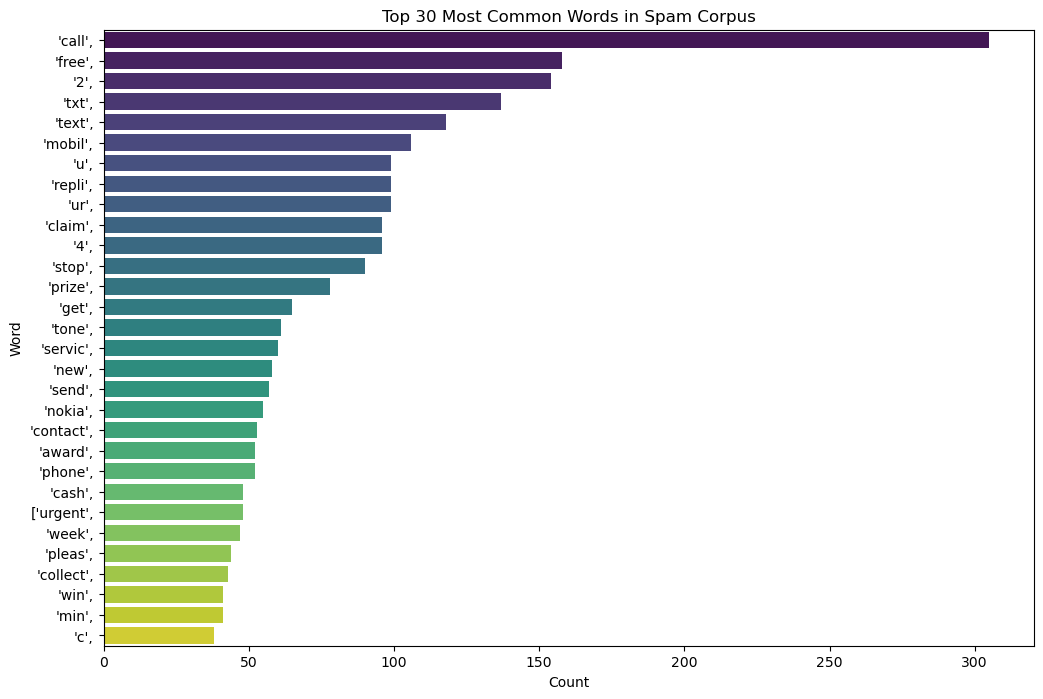

In [144]:
# Create a Counter object to count the occurrences of each word
word_counts = Counter(spam_corpus)

# Create a DataFrame from the Counter object
word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=word_counts_df, palette='viridis')
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()


In [137]:
ham_corpus = []
for msg in df[df['target'] == 0][ 'transformed_text'].tolist():
    for word in msg. split():
        ham_corpus. append (word)

In [138]:
ham_corpus

["['go',",
 "'jurong',",
 "'point',",
 "'crazi',",
 "'avail',",
 "'bugi',",
 "'n',",
 "'great',",
 "'world',",
 "'la',",
 "'e',",
 "'buffet',",
 "'cine',",
 "'got',",
 "'amor',",
 "'wat']",
 "['ok',",
 "'lar',",
 "'joke',",
 "'wif',",
 "'u',",
 "'oni']",
 "['u',",
 "'dun',",
 "'say',",
 "'earli',",
 "'hor',",
 "'u',",
 "'c',",
 "'alreadi',",
 "'say']",
 "['nah',",
 "'think',",
 "'goe',",
 "'usf',",
 "'live',",
 "'around',",
 "'though']",
 "['even',",
 "'brother',",
 "'like',",
 "'speak',",
 "'treat',",
 "'like',",
 "'aid',",
 "'patent']",
 "['per',",
 "'request',",
 "'mell',",
 "'oru',",
 "'minnaminungint',",
 "'nurungu',",
 "'vettam',",
 "'set',",
 "'callertun',",
 "'caller',",
 "'press',",
 "'9',",
 "'copi',",
 "'friend',",
 "'callertun']",
 "['gon',",
 "'na',",
 "'home',",
 "'soon',",
 "'want',",
 "'talk',",
 "'stuff',",
 "'anymor',",
 "'tonight',",
 "'k',",
 "'cri',",
 "'enough',",
 "'today']",
 "['search',",
 "'right',",
 "'word',",
 "'thank',",
 "'breather',",
 "'promis',",
 "'wo

In [139]:
len(ham_corpus)

35413

In [140]:
from collections import Counter
Counter (ham_corpus). most_common (30)

[("'u',", 717),
 ("'go',", 353),
 ("'get',", 295),
 ("'lt',", 271),
 ("'2',", 270),
 ("'gt',", 242),
 ("'come',", 205),
 ("'like',", 196),
 ("'got',", 186),
 ("'ur',", 185),
 ("'time',", 175),
 ("'know',", 173),
 ("'want',", 169),
 ("'call',", 168),
 ("'love',", 166),
 ("'4',", 150),
 ("'good',", 146),
 ("'need',", 143),
 ("'day',", 139),
 ("'one',", 133),
 ("'take',", 120),
 ("'n',", 118),
 ("'make',", 116),
 ("'still',", 116),
 ("'see',", 116),
 ("'lor',", 110),
 ("'home',", 109),
 ("['u',", 106),
 ("'say',", 105),
 ("['ok',", 103)]

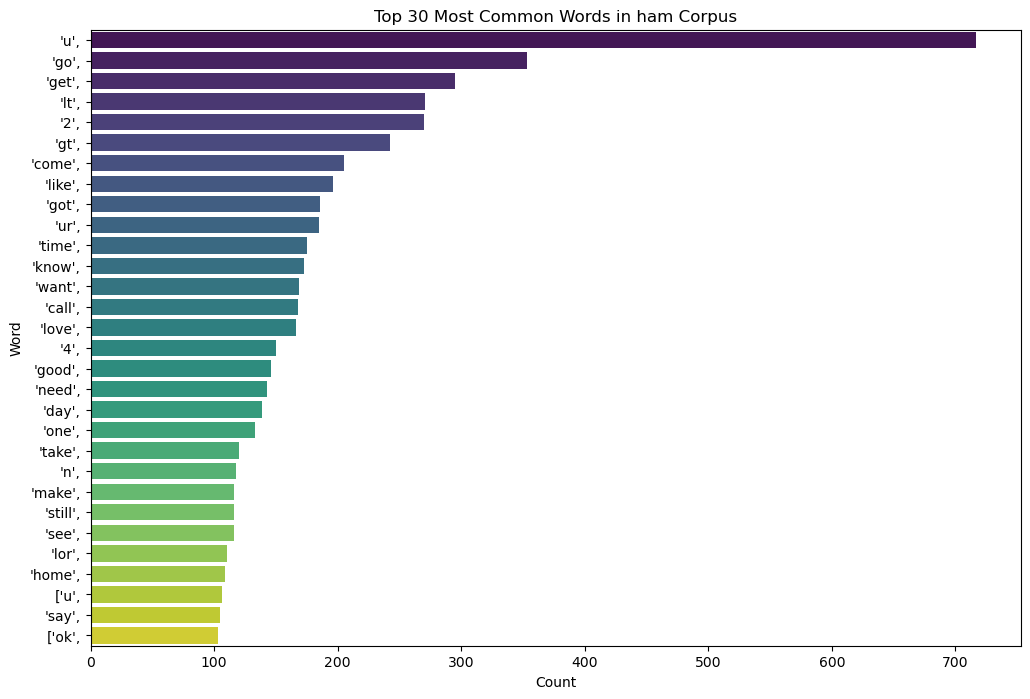

In [146]:
# Create a Counter object to count the occurrences of each word
word_counts = Counter(ham_corpus)

# Create a DataFrame from the Counter object
word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=word_counts_df, palette='viridis')
plt.title('Top 30 Most Common Words in ham Corpus')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()


## 4. Model Building


In [147]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"['go', 'jurong', 'point', 'crazi', 'avail', 'b..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"['ok', 'lar', 'joke', 'wif', 'u', 'oni']"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"['free', 'entri', '2', 'wkli', 'comp', 'win', ..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"['u', 'dun', 'say', 'earli', 'hor', 'u', 'c', ..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"['nah', 'think', 'goe', 'usf', 'live', 'around..."


In [222]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [223]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [224]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [225]:
X.shape

(5169, 3000)

In [226]:
y = df['target'].values

In [227]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [228]:
from sklearn.model_selection import train_test_split

In [229]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [230]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [231]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [232]:
from sklearn. metrics import accuracy_score, confusion_matrix, precision_score

In [233]:
gnb.fit(X_train,y_train)
y_pred1 = gnb. predict (X_test)
print (accuracy_score(y_test,y_pred1))
print (confusion_matrix(y_test,y_pred1))
print (precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [270]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print (accuracy_score(y_test,y_pred2))
print (confusion_matrix(y_test,y_pred2))
print (precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [269]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print (accuracy_score(y_test,y_pred3))
print (confusion_matrix(y_test,y_pred3))
print (precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


# in multinomial naive bayes the precision is 100% we will go with that

# tfidf > mnb

In [236]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [238]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)


In [239]:
# Dictionary of classifiers
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'Bgc':bc,
    'ETC': etc,
    'GBDT': gbdt,
    'XGB': xgb
}

In [240]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [241]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [242]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For SVC
Accuracy - 0.9758220502901354
Precision - 0.9747899159663865
For KNN
Accuracy - 0.9052224371373307
Precision - 1.0
For NB
Accuracy - 0.9709864603481625
Precision - 1.0
For DT
Accuracy - 0.9303675048355899
Precision - 0.8173076923076923
For LR
Accuracy - 0.9584139264990329
Precision - 0.9702970297029703
For RF
Accuracy - 0.9758220502901354
Precision - 0.9829059829059829
For AdaBoost
Accuracy - 0.960348162475822
Precision - 0.9292035398230089
For Bgc
Accuracy - 0.9584139264990329
Precision - 0.8682170542635659
For ETC
Accuracy - 0.9748549323017408
Precision - 0.9745762711864406
For GBDT
Accuracy - 0.9468085106382979
Precision - 0.9191919191919192
For XGB
Accuracy - 0.9671179883945842
Precision - 0.9262295081967213


In [271]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [272]:
performance_df


,Algorithm,Accuracy,Precision
1,KNN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,XGB,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,Bgc,0.958414,0.868217


In [273]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [274]:
performance_df1


,Algorithm,variable,value
0,KNN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,XGB,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,Bgc,Accuracy,0.958414


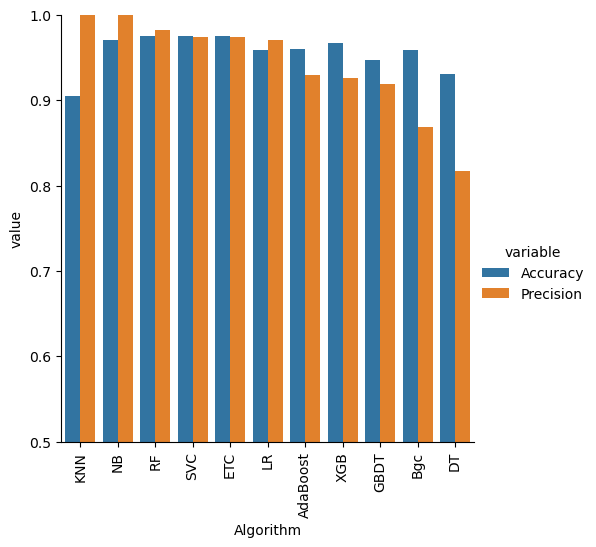

In [275]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()


In [282]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [277]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [278]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [279]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [280]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [281]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KNN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,XGB,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,Bgc,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [283]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [284]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [285]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [286]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [287]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [288]:
from sklearn.ensemble import StackingClassifier

In [289]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [290]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9806576402321083
Precision 0.9538461538461539


In [294]:
from sklearn.naive_bayes import MultinomialNB

# Assuming X_train and y_train are your training data
clf = MultinomialNB()
clf.fit(X_train, y_train)


MultinomialNB()

In [295]:
import pickle

# Dump the TF-IDF vectorizer to a file named 'vectorizer.pkl'
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))

# Dump the Multinomial Naive Bayes classifier to a file named 'model.pkl'
pickle.dump(mnb, open('model.pkl', 'wb'))
